In [481]:
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [482]:
dataset = pd.read_csv('./dataset/loan_data.csv')

In [483]:
dataset.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [484]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [485]:
dataset.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [486]:
dataset.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [487]:
dataset.duplicated().sum()

0

In [488]:
dataset['Gender'].value_counts()

Male      489
Female    112
Name: Gender, dtype: int64

<AxesSubplot: xlabel='Gender', ylabel='count'>

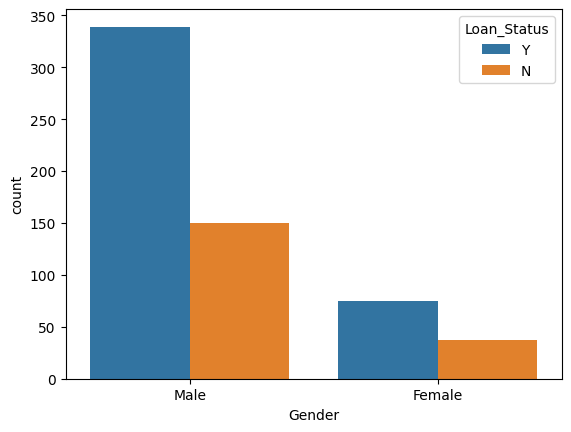

In [489]:
sns.countplot(x='Gender', hue='Loan_Status', data=dataset)

In [490]:
dataset.dropna(inplace=True)

In [491]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 480 entries, 1 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            480 non-null    object 
 1   Gender             480 non-null    object 
 2   Married            480 non-null    object 
 3   Dependents         480 non-null    object 
 4   Education          480 non-null    object 
 5   Self_Employed      480 non-null    object 
 6   ApplicantIncome    480 non-null    int64  
 7   CoapplicantIncome  480 non-null    float64
 8   LoanAmount         480 non-null    float64
 9   Loan_Amount_Term   480 non-null    float64
 10  Credit_History     480 non-null    float64
 11  Property_Area      480 non-null    object 
 12  Loan_Status        480 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 52.5+ KB


In [492]:
dataset.replace({"Loan_Status":{'N':0,'Y':1},"Dependents":{ '3+': 4}},inplace=True)

In [493]:
dataset = pd.get_dummies(dataset, columns = ['Gender','Married','Education','Self_Employed','Property_Area'], drop_first= True)

In [494]:
dataset.head()

,Loan_ID,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Gender_Male,Married_Yes,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban
1,LP001003,1,4583,1508.0,128.0,360.0,1.0,0,1,1,0,0,0,0
2,LP001005,0,3000,0.0,66.0,360.0,1.0,1,1,1,0,1,0,1
3,LP001006,0,2583,2358.0,120.0,360.0,1.0,1,1,1,1,0,0,1
4,LP001008,0,6000,0.0,141.0,360.0,1.0,1,1,0,0,0,0,1
5,LP001011,2,5417,4196.0,267.0,360.0,1.0,1,1,1,0,1,0,1


In [495]:
X = dataset.drop(columns=['Loan_ID','Loan_Status'],axis=1)
Y = dataset['Loan_Status']

In [496]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.1, random_state=2)

In [497]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [498]:
model = keras.Sequential()

In [499]:
model.add(layers.Dense(units=12, activation='relu'))
model.add(layers.Dense(units=8, activation='relu'))
model.add(layers.Dense(units=1, activation='sigmoid'))

In [500]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=["accuracy"])

In [501]:
model.fit(X_train, Y_train, epochs=100, batch_size=32)

Epoch 1/100
14/14 [==============================] - 1s 4ms/step - loss: 0.7375 - accuracy: 0.4005
Epoch 2/100
14/14 [==============================] - 0s 4ms/step - loss: 0.7099 - accuracy: 0.5162
Epoch 3/100
14/14 [==============================] - 0s 4ms/step - loss: 0.6874 - accuracy: 0.6227
Epoch 4/100
14/14 [==============================] - 0s 4ms/step - loss: 0.6669 - accuracy: 0.6597
Epoch 5/100
14/14 [==============================] - 0s 4ms/step - loss: 0.6491 - accuracy: 0.7014
Epoch 6/100
14/14 [==============================] - 0s 4ms/step - loss: 0.6318 - accuracy: 0.7222
Epoch 7/100
14/14 [==============================] - 0s 4ms/step - loss: 0.6151 - accuracy: 0.7269
Epoch 8/100
14/14 [==============================] - 0s 4ms/step - loss: 0.5988 - accuracy: 0.7292
Epoch 9/100
14/14 [==============================] - 0s 3ms/step - loss: 0.5841 - accuracy: 0.7384
Epoch 10/100
14/14 [==============================] - 0s 4ms/step - loss: 0.5708 - accuracy: 0.7407
Epoch 11/

14/14 [==============================] - 0s 4ms/step - loss: 0.4077 - accuracy: 0.8310
Epoch 84/100
14/14 [==============================] - 0s 4ms/step - loss: 0.4070 - accuracy: 0.8310
Epoch 85/100
14/14 [==============================] - 0s 4ms/step - loss: 0.4062 - accuracy: 0.8310
Epoch 86/100
14/14 [==============================] - 0s 3ms/step - loss: 0.4061 - accuracy: 0.8310
Epoch 87/100
14/14 [==============================] - 0s 4ms/step - loss: 0.4051 - accuracy: 0.8333
Epoch 88/100
14/14 [==============================] - 0s 4ms/step - loss: 0.4043 - accuracy: 0.8356
Epoch 89/100
14/14 [==============================] - 0s 4ms/step - loss: 0.4037 - accuracy: 0.8356
Epoch 90/100
14/14 [==============================] - 0s 5ms/step - loss: 0.4030 - accuracy: 0.8333
Epoch 91/100
14/14 [==============================] - 0s 3ms/step - loss: 0.4027 - accuracy: 0.8333
Epoch 92/100
14/14 [==============================] - 0s 4ms/step - loss: 0.4017 - accuracy: 0.8333
Epoch 93/100


In [502]:
y_pred = model.predict(X_test)

2/2 [==============================] - 0s 4ms/step


In [503]:
y_pred = (y_pred > 0.5)

In [504]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(Y_test, y_pred)
print(cm)
accuracy_score(Y_test, y_pred)

[[ 7  8]
 [ 0 33]]


0.8333333333333334

In [509]:
print(model.predict(sc.transform([[1,4583,1508.0,128.0,360.0,1.0,1,1,0,0,0,0]])),"predicted Value")

1/1 [==============================] - 0s 21ms/step
[[0.7816025]] predicted Value


C:\Users\AMIT\anaconda3\envs\Vtensorflow\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
